In [1]:
# Classical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# PyTorch
import torch
from torch import nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
from torch import optim

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = 15, 7

In [2]:
data = pd.read_csv('./data/digit-recognizer/train.csv')
data = np.array(data)

In [3]:
class MNIST(Dataset):
    def __init__(self, data):
        self.data = data
    
    def __getitem__(self, index):
        X = data[index][1:]
        y = data[index][0]
        return (torch.from_numpy(X).float()/256, 
                torch.LongTensor(np.array([y])))
    
    def __len__(self):
        return len(self.data)

In [4]:
class SimpleNeuralNet(nn.Module):
    def __init__(self, layers):
        super().__init__()
        self.linears = nn.ModuleList([
            nn.Linear(layers[i], layers[i+1]) for i in range(len(layers) - 1)
        ])
        
    def forward(self, x):
        for lin in self.linears:
            lin_x = lin(x)
            x = F.relu(lin_x)
        return F.log_softmax(lin_x, dim=1)

In [ ]:
def init_net():
    return SimpleNeuralNet([IMAGE_SIZE, 100, 100, 10])

In [5]:
mnist = MNIST(data)
data_dl = DataLoader(mnist, batch_size = 256, shuffle=True, num_workers=0)

In [6]:
epochs = 3
criterion = nn.NLLLoss()

In [7]:
## Create architecture
IMAGE_SIZE = 28 * 28
net = init_net()

# Weight/biases
wbs = [(lin.weight, lin.bias) for lin in net.linears]
losses = []
lr = 1e-2

In [8]:
print("[Epoch, Loss]")
for epoch in range(epochs):
    for i, batch in enumerate(data_dl):
        inputs, labels = Variable(batch[0]), Variable(batch[1])
        outputs = net(inputs)
        
        loss = criterion(outputs, labels.squeeze(-1))
        losses.append(loss)
        loss.backward()
        
        for w, b in wbs:
            w.data -= lr * w.grad.data
            b.data -= lr * b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()
    print("[{}, {}]".format(epoch, loss.data))

[Epoch, Loss]
[0, 
 2.2566
[torch.FloatTensor of size 1]
]
[1, 
 2.1049
[torch.FloatTensor of size 1]
]
[2, 
 1.6072
[torch.FloatTensor of size 1]
]


In [9]:
sgd_losses = [(l.data.numpy()[0]) for l in losses]
sgd_log_losses_ = [np.log(l) for l in sgd_losses]

Text(0.5,1,'Vanilla SGD')

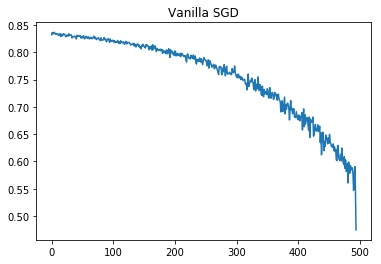

In [10]:
plt.plot(sgd_log_losses_)
plt.title("Vanilla SGD")

## Adding momentum